### INTRODUCTION

*Name: Nurfiah Idris*  
*Batch: 005*  
*Assignment: Milestone 2 / Phase 2*

**About Dataset**  

This dataset collected from [kaggle](ttps://www.kaggle.com/vipoooool/new-plant-diseases-dataset) and originally it consists of around 270K rgb images categorized into 38 different type of healthy and diseased crop leaves (classes). However, I did some editing on this dataset and dropped some of classes and certainly with its data aswell with the result that it remains 29 classes of healthy and disease crop leaves. They are 7 kinds of common crops in Indonesia of Apple, Corn, Grape, Pepper, Potato, Strawberry, and Tomato.
This dataset has separated it's training, validation, and testing data.

**Objectives**  

This project aims to build a model to classify or predict given crop leaves, whether it's a healthy one or have a certain kind of disease.

### IMPORT LIBRARY

In [38]:
# Basic modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import seaborn as sns


# Preprocessing
from tensorflow.keras.preprocessing import image

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Modeling modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input, Model

# Pretrained models 
from keras.applications.mobilenet import preprocess_input


### DATA LOADING & EDA

In [39]:
# Store directory name of all needed data into variable
train_dir = 'plant_images/train'
validation_dir = 'plant_images/validation'
test_dir = 'plant_images/test'

In [40]:
# Create function for checking the class name and total images inside the subfolder o f dataset
def check_total_data(data):
    name = []
    total = []
    for i in np.sort(os.listdir(data)):
        name_dir = os.listdir(data+"/"+i)
        name.append(i)
        total.append(len(name_dir))
    return {"name": name, "total":total}

In [41]:
# Check the list of label name 
class_name = check_total_data(train_dir)
print(class_name['name'])

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [6]:
print(f"The total of class on dataset is: {len(class_name['name'])}")
print(f"The total of train data: {sum(check_total_data(train_dir)['total'])}")
print(f"The total of validation data: {sum(check_total_data(validation_dir)['total'])}")

The total of class on dataset is: 29
The total of train data: 113423
The total of validation data: 28313


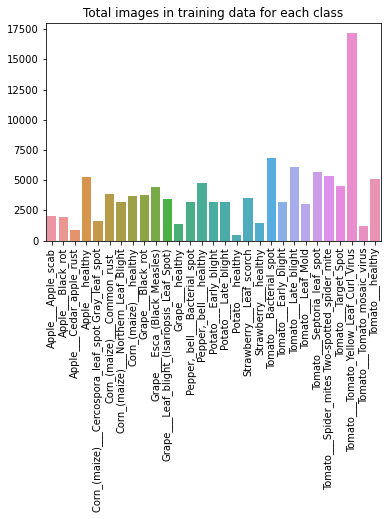

In [9]:
# Plotting total training data of each classes
train_data = check_total_data(train_dir)
plt.title(label = "Total images in training data for each class")
sns.barplot(x= train_data['name'], y= train_data['total'])
plt.xticks(rotation=90)
plt.show()

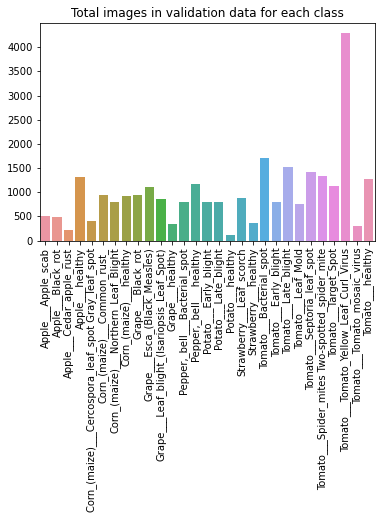

In [10]:
# Plotting total validation data of each classes
validation_data = check_total_data(validation_dir)
plt.title(label = "Total images in validation data for each class")
sns.barplot(x= validation_data['name'], y= validation_data['total'])
plt.xticks(rotation=90)
plt.show()

In [42]:
# create function to view random image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+ "/" + random_image[0])
    plt.figure(figsize=(10,8))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img

In [43]:
# create function to view random image
def view_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+ "/" + random_image[0])
    return img

Image shape: (256, 256, 3)


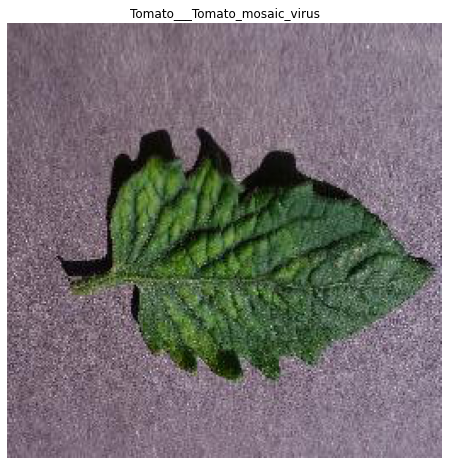

In [44]:
# view random image on tomato crop
sample = view_random_image(target_dir= f'{train_dir}/', target_class='Tomato___Tomato_mosaic_virus')
# Check the shape of image
print(f"Image shape: {sample.shape}")

Image shape: (256, 256, 3)


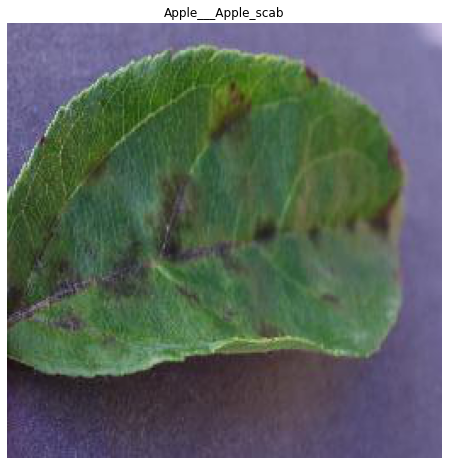

In [53]:
# view random image on apple crop
sample = view_random_image(target_dir= f'{train_dir}/', target_class='Apple___Apple_scab')
# Check the shape of image
print(f"Image shape: {sample.shape}")

It most likely that the shape of dataset is (256,256) rgb on each image. And we can see that the quality of the image is not really good. There are noises on the background and also bluring effect exist around the edge of the image itself.  

Image shape: (256, 256, 3)


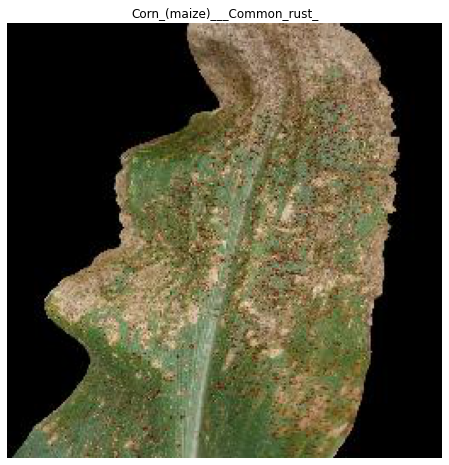

In [58]:
# view random image on apple crop
sample = view_random_image(target_dir= f'{train_dir}/', target_class='Corn_(maize)___Common_rust_')
# Check the shape of image
print(f"Image shape: {sample.shape}")

The images of corn crop leaf shows better images in respect to the quality of picture which is clearer than the other class of crop.

Text(0.5, 1.0, 'Apple___healthy')

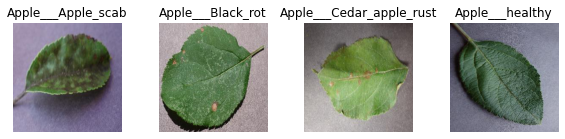

In [59]:
# Display sample of Apple with its each class
class_name = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy']
fig = plt.figure(figsize=(10,2))
columns = 4

fig.add_subplot(1, columns, 1)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[0]))
plt.axis('off')
plt.title(class_name[0])

fig.add_subplot(1, columns, 2)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[1]))
plt.axis('off')
plt.title(class_name[1])

fig.add_subplot(1, columns, 3)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[2]))
plt.axis('off')
plt.title(class_name[2])

fig.add_subplot(1, columns, 4)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[3]))
plt.axis('off')
plt.title(class_name[3])

Text(0.5, 1.0, 'Corn_(maize)___healthy')

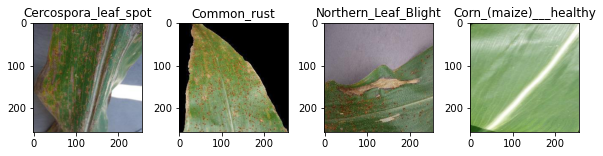

In [60]:
# Display sample of Corn with its each class
class_name = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy']
fig = plt.figure(figsize=(10,2))
columns =  4

fig.add_subplot(1,columns,1)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[0]))
plt.title('Cercospora_leaf_spot')
fig.add_subplot(1,columns,2)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[1]))
plt.title('Common_rust')
fig.add_subplot(1,columns,3)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[2]))
plt.title('Northern_Leaf_Blight')
fig.add_subplot(1,columns,4)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[3]))
plt.title(class_name[3])

The common_rust class of corn crop leaf images have black bacground which is different from other classes bacground.

Text(0.5, 1.0, 'Grape___healthy')

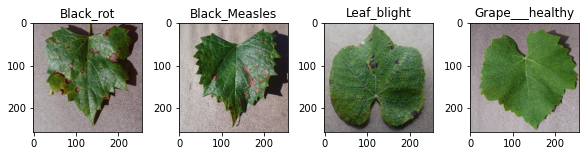

In [61]:
# Display sample of Grape with its each class
class_name = ['Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy']
fig = plt.figure(figsize=(10,2))
columns = 4

fig.add_subplot(1,columns,1)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[0]))
plt.title('Black_rot')
fig.add_subplot(1,columns,2)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[1]))
plt.title('Black_Measles')
fig.add_subplot(1,columns,3)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[2]))
plt.title('Leaf_blight')
fig.add_subplot(1,columns,4)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[3]))
plt.title(class_name[3])

Text(0.5, 1.0, 'Pepper,_bell___healthy')

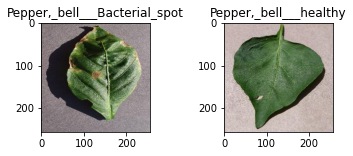

In [62]:
# Display sample of Pepper with its each class
class_name = ['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy']
fig = plt.figure(figsize=(6,2))

fig.add_subplot(1,2,1)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[0]))
plt.title(class_name[0])
fig.add_subplot(1,2,2)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[1]))
plt.title(class_name[1])

Text(0.5, 1.0, 'Potato___healthy')

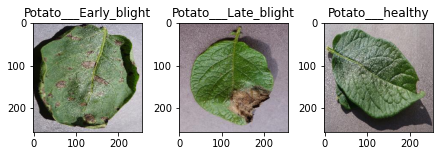

In [63]:
# Display plt.imshow( Pota its each class)
class_name = ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']
fig = plt.figure(figsize=(10,2))

fig.add_subplot(1,4,1)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[0]))
plt.title(class_name[0])
fig.add_subplot(1,4,2)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[1]))
plt.title(class_name[1])
fig.add_subplot(1,4,3)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[2]))
plt.title(class_name[2])

Text(0.5, 1.0, 'Strawberry___healthy')

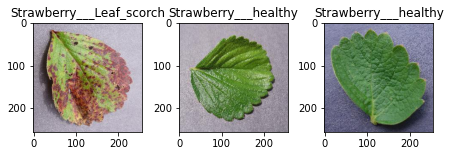

In [64]:
# Display sample of Strawberry with its each class
class_name = ['Strawberry___Leaf_scorch','Strawberry___healthy','Apple___Cedar_apple_rust','Apple___healthy']
fig = plt.figure(figsize=(10,2))

fig.add_subplot(1,4,1)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[0]))
plt.title(class_name[0])
fig.add_subplot(1,4,2)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[1]))
plt.title(class_name[1])
fig.add_subplot(1,4,3)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[1]))
plt.title(class_name[1])

Personally, I could not differentiate between the strawberry leaf and grape leaf but I wish the further train model might be able to find the pattern and spot the difference between them. 

Text(0.5, 1.0, 'Tomato_mosaic_virus')

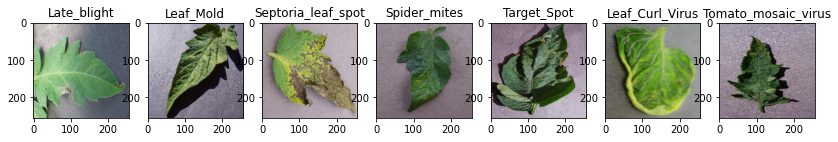

In [65]:
# Display sample of Tomato with its each class
class_name = ['Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']
fig  = plt.figure(figsize=(14,2))

fig.add_subplot(1,7,1)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[0]))
plt.title('Late_blight')
fig.add_subplot(1,7,2)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[1]))
plt.title('Leaf_Mold')
fig.add_subplot(1,7,3)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[2]))
plt.title('Septoria_leaf_spot')
fig.add_subplot(1,7,4)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[3]))
plt.title('Spider_mites')
fig.add_subplot(1,7,5)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[4]))
plt.title('Target_Spot')
fig.add_subplot(1,7,6)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[5]))
plt.title('Leaf_Curl_Virus')
fig.add_subplot(1,7,7)
plt.imshow(view_image(target_dir= f'{train_dir}/', target_class=class_name[6]))
plt.title('Tomato_mosaic_virus')

  *Insight:*  
  
- The total images of all classes on train data is 113423, and the the total images on validation data is 28313.
- The total classes on dataset is 29 classes of healthy and diseased with 7 kinds of crop when each crop have different class, as follows:
  1. Apple : 4 classes (1 healthy class and 3 disease class).
  2. Corn : 4 classes (1 healthy class and 3 disease class).
  3. Grape : 4 classes (1 healthy class and 3 disease class).
  4. Pepper : 2 classes (1 healthy class and 1 disease class).
  5. Potato : 3 classes (1 healthy class and 2 disease class).
  6. Strawberry : 2 classes (1 healthy class and 1 disease class).
  7. Tomato : 10 classes ( 1 healthy class and 9 disease class).
- Tomato crop consists of many kinds of disease compare to others crops while the Pepper crop only has 1 kind of disease in this dataset.
- Tomato___Tomato_Yellow_Leaf_Curl_Virus class has the highest total of images when Potato___healthy class is the lowest among all the class. Therefore, this dataset is classified as imbalance in accordance to the total of images on each class we have.
- It seems to me that this dataset was taken without putting careful consideration on the light exposure of the image which probably might confused model and might recognise the overexposure of light in the image as spot of disease and as the result the model will miss classify the image.

### PREPROCESSING

In [32]:
# preprocess data 
datagen = ImageDataGenerator(rescale = 1. / 255.0)

# Set train data 
train_data = datagen.flow_from_directory(
    train_dir, batch_size =32,shuffle=False, target_size = (256,256), class_mode = 'categorical'
)

# Set validation data
validation_data = datagen.flow_from_directory(
    validation_dir, batch_size =32,shuffle=False, target_size = (256,256), class_mode = 'categorical'
)


Found 113420 images belonging to 29 classes.
Found 28312 images belonging to 29 classes.


### DEFINE AND TRAIN MODEL

In [86]:
# Create model architecture with Sequential API
model = Sequential()
model.add(Conv2D(16,3, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32,3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

In [87]:
# Let's have a look the model architecture which have been created
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [11]:
# Compile data and set configuration for model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
# Create early stop callbacks with number of patience is 5
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [9]:
# Train data with 15 epochs at first
history = model.fit(train_data, epochs=15, validation_data = validation_data, callbacks=[early_stop])

2021-12-28 16:13:36.118956: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-28 16:13:36.244618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/15
3545/3545 [==============================] - ETA: 0s - loss: 2.8838 - accuracy: 0.2216

2021-12-28 16:22:25.461658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3545/3545 [==============================] - 595s 168ms/step - loss: 2.8838 - accuracy: 0.2216 - val_loss: 2.4467 - val_accuracy: 0.2984
Epoch 2/15
3545/3545 [==============================] - 1099s 310ms/step - loss: 2.0621 - accuracy: 0.4054 - val_loss: 1.3553 - val_accuracy: 0.5985
Epoch 3/15
3545/3545 [==============================] - 1111s 314ms/step - loss: 1.4924 - accuracy: 0.5482 - val_loss: 0.9488 - val_accuracy: 0.6862
Epoch 4/15
3545/3545 [==============================] - 1082s 305ms/step - loss: 1.1563 - accuracy: 0.6359 - val_loss: 0.7108 - val_accuracy: 0.7690
Epoch 5/15
3545/3545 [==============================] - 991s 280ms/step - loss: 0.9582 - accuracy: 0.6939 - val_loss: 0.5877 - val_accuracy: 0.8156
Epoch 6/15
3545/3545 [==============================] - 1036s 292ms/step - loss: 0.8238 - accuracy: 0.7343 - val_loss: 0.4560 - val_accuracy: 0.8481
Epoch 7/15
3545/3545 [==============================] - 1056s 298ms/step - loss: 0.7015 - accuracy: 0.7694 - val_loss: 

In [48]:
# Create function plotting for model tracking
def plot_model_eval(data):
    pd.DataFrame(data.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

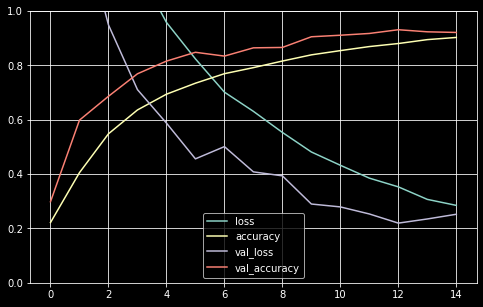

In [12]:
# Plot tracking history
plot_model_eval(history)

According to plotting above, we can see that this model is quite good in training where the accuracy value was increasing from first epoch until the last epoch and also the loss value was decreasing on each epoch eventhough there was small exploding on epoch fifth but it gone smooth and convergent until the last epoch.

For improvement later on, I will try to continue training this model with more epoch to find out whether this model will still improve on its accuracy in the next epoch or not and it's better to save this model first and load it again on the next training.

In [20]:
# Save model
model.save("my_model.h5")

### MODEL IMPROVEMENT

In [29]:
# Load saving model
model = load_model('my_model.h5')

As a result of the previous training consume a very long time hours, I saved the model first and here I will try to continue doing more train on the saved model before to improve the accuracy.  

*Note:*  

*I used 5 epoch only, however I looped it for 3 times until I got the maximum number of accuracy score and the minimum value of loss. I keep doing train for 5 epoch repeatly as long as the accuracy value is increasing and the loss is decreasing.*

In [120]:
# Train more epoch
history = model.fit(train_data, epochs=5, validation_data = validation_data, callbacks=[early_stop])

Epoch 1/5
3545/3545 [==============================] - 649s 183ms/step - loss: 0.0634 - accuracy: 0.9768 - val_loss: 0.2273 - val_accuracy: 0.9488
Epoch 2/5
3545/3545 [==============================] - 1079s 304ms/step - loss: 0.0594 - accuracy: 0.9782 - val_loss: 0.2135 - val_accuracy: 0.9538
Epoch 3/5
3545/3545 [==============================] - 877s 247ms/step - loss: 0.0600 - accuracy: 0.9783 - val_loss: 0.2142 - val_accuracy: 0.9535
Epoch 4/5
3545/3545 [==============================] - 828s 233ms/step - loss: 0.0575 - accuracy: 0.9794 - val_loss: 0.2226 - val_accuracy: 0.9538
Epoch 5/5
3545/3545 [==============================] - 872s 246ms/step - loss: 0.0614 - accuracy: 0.9776 - val_loss: 0.2303 - val_accuracy: 0.9542


In [ ]:
# Save model
model.save("my_model.h5")

### MODEL EVALUATION

In this section, I will do more evaluation on model using classification_report and confusion_matrix from scikit learn module in order to find out the precision, recall, and f1 score of each classes.

In [34]:
# Predict validation data
predictions = model.predict(validation_data)
predicted_classes = np.argmax(predictions, axis=1)
# Get true classes and predicted classes 
true_classes = validation_data.classes 
class_labels = list(validation_data.class_indices.keys())

In [79]:
# Have a look classification report
report = classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.93      0.92       504
                                 Apple___Black_rot       0.95      0.97      0.96       496
                          Apple___Cedar_apple_rust       0.97      0.96      0.97       220
                                   Apple___healthy       0.97      0.97      0.97      1316
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.68      0.78       408
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       952
               Corn_(maize)___Northern_Leaf_Blight       0.84      0.98      0.91       788
                            Corn_(maize)___healthy       1.00      1.00      1.00       928
                                 Grape___Black_rot       0.96      0.91      0.93       944
                      Grape___Esca_(Black_Measles)       0.94      0.96      0.

- From the table above, we can see clearly that this model is quite good as almost class have f1 score nearly perfect score except for Tomato__Early_blight class with f1 score 0.82 and recall 0.76 which is still classified as good enough.
- For class of Corn_(maize)__healthy, it has perfect score of 1 which indicates that there is no any wrong prediction on validation data. In my point of view, it happens probably because of the corn images are clearer or have better quality than others class images.

*For better observation, here I will display it's confusion matrix aswell.*

Text(0.5, 1.0, 'Confusion Matrix')

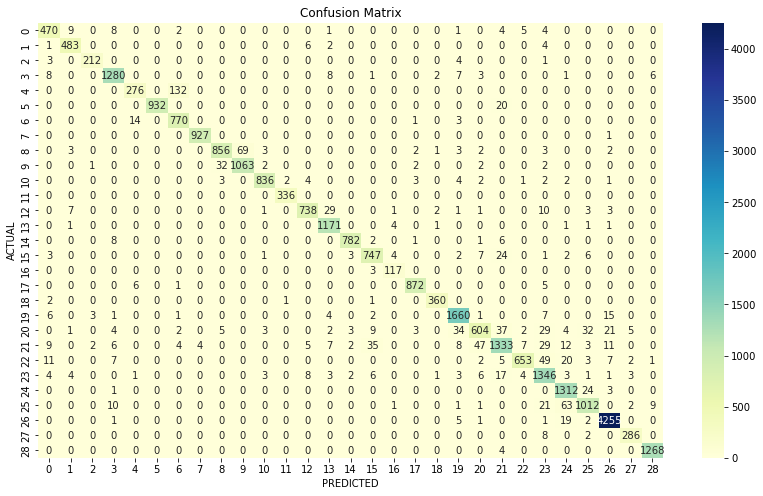

In [36]:
# Display confusion_matrix
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.set_xlabel('PREDICTED')
ax.set_ylabel('ACTUAL')
ax.set_title('Confusion Matrix')

To find out the class name of each index of this confusion_matrix table, we can see the table below.

### MODEL INFERENCE

In [10]:
# Get class names with indices 
class_indices = train_data.class_indices
values=np.array([list(class_indices.keys()), list(class_indices.values())])

In [11]:
# Create class_name
classes = {'class':list(class_indices.keys())}
df_classes = pd.DataFrame(data = classes)
df_classes

,class
0,Apple___Apple_scab
1,Apple___Black_rot
2,Apple___Cedar_apple_rust
3,Apple___healthy
4,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
5,Corn_(maize)___Common_rust_
6,Corn_(maize)___Northern_Leaf_Blight
7,Corn_(maize)___healthy
8,Grape___Black_rot
9,Grape___Esca_(Black_Measles)


In [59]:
# Create function for prepared image 
def prepare_image(file, isPretrained, size):
    img= image.load_img(file, target_size=size)
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    if isPretrained:
        return preprocess_input(img_batch)
    else:
        return img_batch/255

In [21]:
# Predict new single image 
pred = model.predict(prepare_image('/Users/nurfiahidris/Downloads/new_data/tomato_disease.jpeg', False,(256,256)))
print(f"Prediction class is: {df_classes.loc[pred.argmax()]['class']}") 
print(pred[0].round(2))

Prediction class is: Corn_(maize)___Northern_Leaf_Blight
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [85]:
# Predict multiple images from testing data   
multi_pred = []
confidence = []

# Loop through to predict all images in testing data
for img in os.listdir("plant_images/test"):
  result = model.predict(prepare_image(f"plant_images/test/{img}",isPretrained = False, size=(256,256)))
  class_name = df_classes.loc[result.argmax()]['class']
  prob = np.max(result).round(2)
  multi_pred.append(class_name)
  confidence.append(prob)

# Create dataframe to show the result of each image prediction with it's confidence level
prediction_result = pd.DataFrame({"class_name":multi_pred, "confidence":confidence})
print(f"The average probability result of test prediction is: {prediction_result.confidence.mean()} ")

The average probability result of test prediction is: 0.9333333373069763 


### PRETRAINED MODEL

Here I will try to train model using pretrained model from keras tensorflow ResNet just for comparison. 

In [89]:
# Define pretrained model
base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(256, 256, 3),include_top=False,weights='imagenet')
base_model.trainable = False

In [90]:
# Create functional API architecture for MobileNet Pretrained model
pooling = tf.keras.layers.GlobalAveragePooling2D()
layer_1 = Dense(29)
prediction_layer = Dense(29)
softmax = Activation('softmax')

inputs = Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = pooling(x)
x = Dropout(0.2)(x)
x = layer_1(x)
outputs = prediction_layer(x)
outputs = softmax(outputs)

model = Model(inputs, outputs)

In [91]:
# Let's have a look the model architecture of model with pretrained model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 8, 8, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 29)                59421     
_________________________________________________________________
dense_9 (Dense)              (None, 29)                870       
_________________________________________________________________
activation_3 (Activation)    (None, 29)                0   

In [46]:
# Compile and train model
model.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


2022-01-05 12:07:41.862414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3545/3545 [==============================] - ETA: 0s - loss: 1.1433 - accuracy: 0.6787

2022-01-05 13:06:35.642166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3545/3545 [==============================] - 4432s 1s/step - loss: 1.1433 - accuracy: 0.6787 - val_loss: 0.6891 - val_accuracy: 0.7774
Epoch 2/5
3545/3545 [==============================] - 4438s 1s/step - loss: 0.6987 - accuracy: 0.7913 - val_loss: 0.6018 - val_accuracy: 0.8204
Epoch 3/5
3545/3545 [==============================] - 5581s 2s/step - loss: 0.6856 - accuracy: 0.7993 - val_loss: 0.6172 - val_accuracy: 0.8253
Epoch 4/5
3545/3545 [==============================] - 4585s 1s/step - loss: 0.6848 - accuracy: 0.8015 - val_loss: 0.5831 - val_accuracy: 0.8383
Epoch 5/5
3545/3545 [==============================] - 5224s 1s/step - loss: 0.6891 - accuracy: 0.8038 - val_loss: 0.6341 - val_accuracy: 0.8166


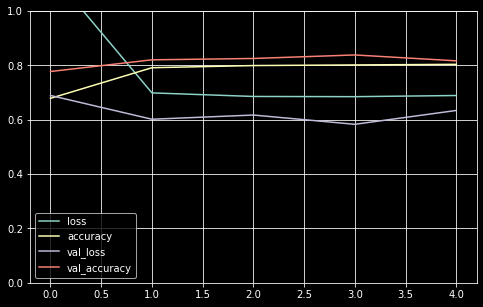

In [49]:
# Plot tracking history
plot_model_eval(history)

In [56]:
# Get validation data
validation = model.evaluate(validation_data)

885/885 [==============================] - 632s 714ms/step - loss: 0.6341 - accuracy: 0.8166


In [128]:
# Predict new image 
pred = model.predict(prepare_image('plant_images/validation/Strawberry___Leaf_scorch/0a08af15-adfe-447c-8ed4-17ed2702d810___RS_L.Scorch 0054_90degFlipLR.JPG', False,(256,256)))
print(f"Prediction class is: {df_classes.loc[pred.argmax()]['class']}") 

2022-01-04 10:36:43.784232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Prediction class is: Strawberry___Leaf_scorch


In [ ]:
# Save pretrained model
model.save("resnetv2_model.h5")

### CONCLUSION

- The dataset using consists of different total number of images on each class which the highest number of images exist in Tomato___Tomato_Yellow_Leaf_Curl_Virus with the total number of around 17.145 images and the lowest is Potato__healthy class with the total number of around only 489 images.
- The quality of the images in dataset are not in the best quality with many noices and bluring inside. However, it is still consider as good enough images to use in model training purposes.
- The model create using sequential API without using model pretrained is better than model using one in accordance to the accuracy score, f1 score, and loss value, as described below:  
  1. without pretrained model = accuracy(0.97), loss(0.06)
  2. with pretrained model = accuracy(0.81), loss(0.63)
- Model without using pretrained will be use as final model in deployment.  
- This is what we need to give more attention for the next improvement:  
  1. *"Low quality images should improve testing results on low quality images, but perhaps this may also result in decreased performance on high quality images."*
  2. Add more training images to make it varied to avoid miss classification, such as doing augmented on images, add new data with high quality, etc.

*Note:*  
*This project deployed on heroku using FastApi library. For testing purposes can be accessed [here](https://planting-project.herokuapp.com/docs) and to get the detail documentation we can go [here](https://planting-project.herokuapp.com/redoc) .*